# Homework: Basic Artificial Neural Networks

The goal of this homework is simple, yet an actual implementation may take some time :). We are going to write an Artificial Neural Network (almost) from scratch. The software design was heavily inspired by [PyTorch](http://pytorch.org) which is the main framework of our course 

This homework requires sending **multiple** files, please do not forget to include all the files when sending to TA. The list of files:
- This notebook
- homework_modules.ipynb with all blocks implemented (except maybe `Conv2d` and `MaxPool2d` layers implementation which are part of 'advanced' version of this homework)
- homework_differentiation.ipynb

In [1]:
%matplotlib inline
from time import time, sleep
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

# Framework

Implement everything in `Modules.ipynb`. Read all the comments thoughtfully to ease the pain. Please try not to change the prototypes.

Do not forget, that each module should return **AND** store `output` and `gradInput`.

The typical assumption is that `module.backward` is always executed after `module.forward`,
so `output` is stored, this would be useful for `SoftMax`. 

### Tech note
Prefer using `np.multiply`, `np.add`, `np.divide`, `np.subtract` instead of `*`,`+`,`/`,`-` for better memory handling.

Example: suppose you allocated a variable 

```
a = np.zeros(...)
```
So, instead of
```
a = b + c  # will be reallocated, GC needed to free
``` 
You can use: 
```
np.add(b,c,out = a) # puts result in `a`
```

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# (re-)load layers
%run /content/drive/MyDrive/ML7bit/homework01/homework_modules.ipynb

# Toy example

Use this example to debug your code, start with logistic regression and then test other layers. You do not need to change anything here. This code is provided for you to test the layers. Also it is easy to use this code in MNIST task.

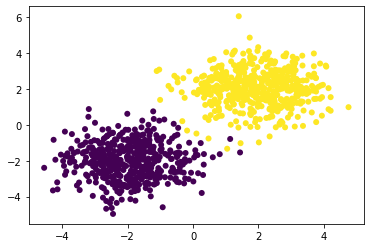

In [4]:
# Generate some data
N = 500

X1 = np.random.randn(N,2) + np.array([2,2])
X2 = np.random.randn(N,2) + np.array([-2,-2])

Y = np.concatenate([np.ones(N),np.zeros(N)])[:,None]
Y = np.hstack([Y, 1-Y])

X = np.vstack([X1,X2])
plt.scatter(X[:,0],X[:,1], c = Y[:,0], edgecolors= 'none')

Define a **logistic regression** for debugging. 

In [5]:
net = Sequential()
net.add(Linear(2, 2))
net.add(LogSoftMax())

criterion = ClassNLLCriterion()

print(net)

# Test something like that then 

net = Sequential()
net.add(Linear(2, 4))
net.add(ReLU())
net.add(Linear(4, 2))
net.add(LogSoftMax())

Linear 2 -> 2
LogSoftMax



Start with batch_size = 1000 to make sure every step lowers the loss, then try stochastic version.

In [6]:
# Iptimizer params
optimizer_config = {'learning_rate' : 1e-1, 'momentum': 0.9}
optimizer_state = {}

# Looping params
n_epoch = 20
batch_size = 128

In [7]:
# batch generator
def get_batches(dataset, batch_size):
    X, Y = dataset
    n_samples = X.shape[0]
        
    # Shuffle at the start of epoch
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        
        batch_idx = indices[start:end]
    
        yield X[batch_idx], Y[batch_idx]

### Train

Basic training loop. Examine it.

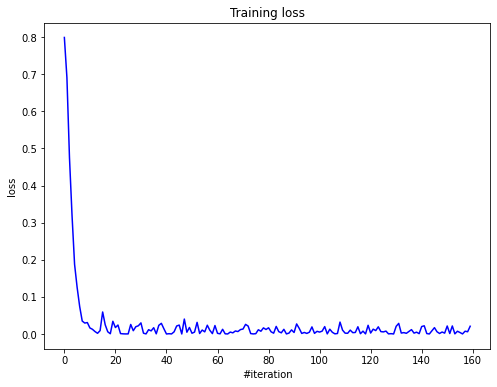

Current loss: 0.020892


In [8]:
loss_history = []

for i in range(n_epoch):
    for x_batch, y_batch in get_batches((X, Y), batch_size):
        
        net.zeroGradParameters()
        
        # Forward
        predictions = net.forward(x_batch)
        loss = criterion.forward(predictions, y_batch)
    
        # Backward
        dp = criterion.backward(predictions, y_batch)
        net.backward(x_batch, dp)
        
        # Update weights
        sgd_momentum(net.getParameters(), 
                     net.getGradParameters(), 
                     optimizer_config,
                     optimizer_state)      
        
        loss_history.append(loss)

    # Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(8, 6))
        
    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(loss_history, 'b')
    plt.show()
    
    print('Current loss: %f' % loss)    

# Digit classification 

We are using old good [MNIST](http://yann.lecun.com/exdb/mnist/) as our dataset.

In [9]:
import sys
sys.path.append('/content/drive/MyDrive/ML7bit/homework01/')

In [10]:
import mnist

#from tensorflow.keras.datasets import mnist

X_train, y_train, X_val, y_val, X_test, y_test = mnist.load_dataset()

One-hot encode the labels first.

In [11]:
# Your code goes here. ################################################
def one_hot(labels):
    return np.eye(10)[labels.reshape(-1)]

one_hot_y_train = one_hot(y_train)
one_hot_y_val = one_hot(y_val)
one_hot_y_test = one_hot(y_test)

X_train = X_train.reshape([len(X_train),-1])
X_val = X_val.reshape([len(X_val),-1])
X_test = X_test.reshape([len(X_test),-1])

def accuracy(prediction, label):
    pred = np.argmax(prediction, axis = -1)
    return 1 - len(np.nonzero(label-pred)[0])/len(label)
#

- **Compare** `ReLU`, `ELU`, `LeakyReLU`, `SoftPlus` activation functions. 
You would better pick the best optimizer params for each of them, but it is overkill for now. Use an architecture of your choice for the comparison.
- **Try** inserting `BatchNormalization` (folowed by `ChannelwiseScaling`) between `Linear` module and activation functions.
- Plot the losses both from activation functions comparison and `BatchNormalization` comparison on one plot. Please find a scale (log?) when the lines are distinguishable, do not forget about naming the axes, the plot should be goodlooking.
- Plot the losses for two networks: one trained by momentum_sgd, another one trained by Adam. Which one performs better?
- Hint: good logloss for MNIST should be around 0.5. 

In [12]:
# Your code goes here. ################################################


**Compare**

n_epoch = 30 out of 30
Current duration of training 
 for ReLU: 406.8728 s, 
 for ELU: 426.124 s, 
 for LeakyReLU: 411.4735 s, 
 for SoftPlus: 434.8993 s


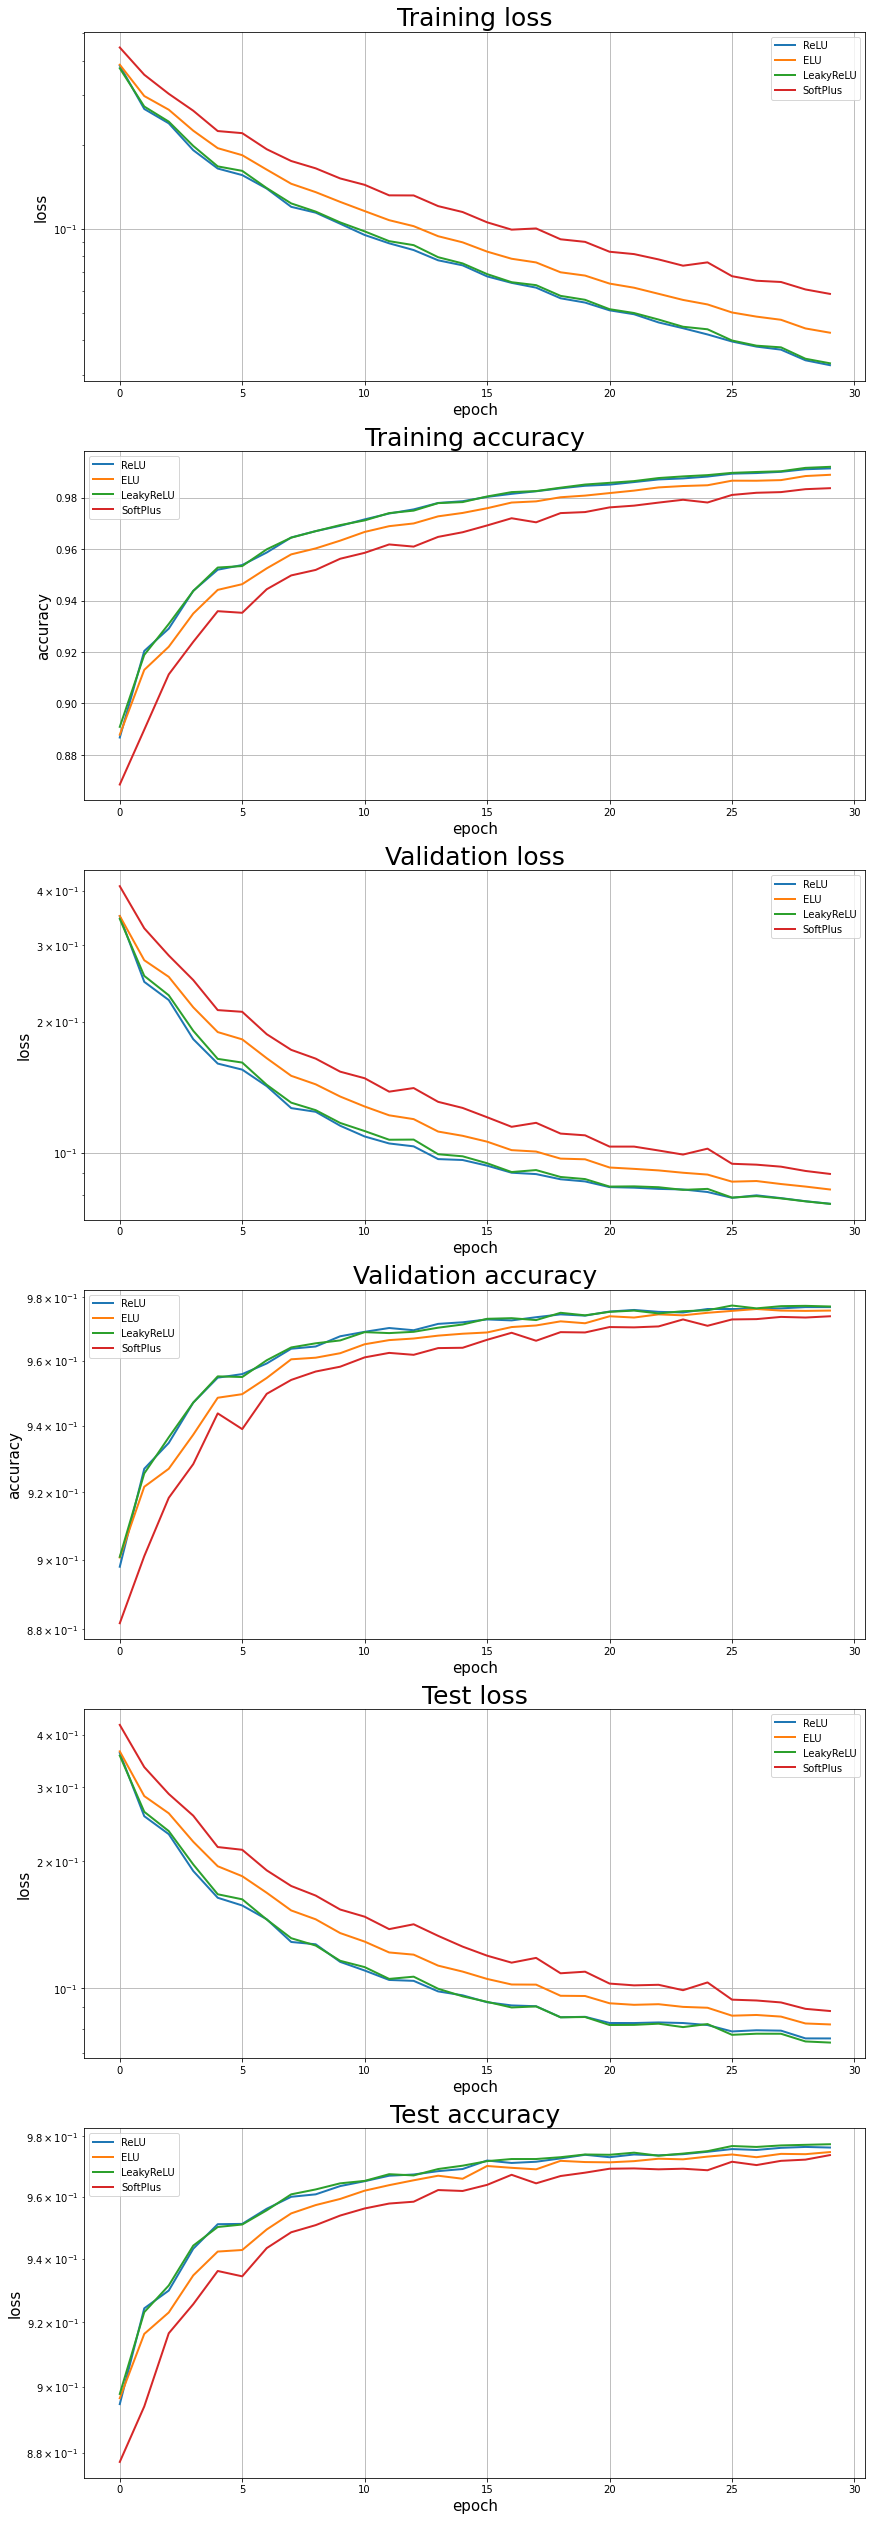

Resulting duration of training: 
 for ReLU: 406.8728 s, 
 for ELU: 426.124 s, 
 for LeakyReLU: 411.4735 s, 
 for SoftPlus: 434.8993 s


In [13]:
net_relu = Sequential()
net_relu.add(Linear(28*28, 200))
net_relu.add(ReLU())
net_relu.add(Linear(200,10))
net_relu.add(LogSoftMax())
criterion_relu = ClassNLLCriterion()

net_elu = Sequential()
net_elu.add(Linear(28*28, 200))
net_elu.add(ELU())
net_elu.add(Linear(200,10))
net_elu.add(LogSoftMax())
criterion_elu = ClassNLLCriterion()

net_leakrelu = Sequential()
net_leakrelu.add(Linear(28*28, 200))
net_leakrelu.add(LeakyReLU())
net_leakrelu.add(Linear(200,10))
net_leakrelu.add(LogSoftMax())
criterion_leakrelu = ClassNLLCriterion()

net_soft = Sequential()
net_soft.add(Linear(28*28, 200))
net_soft.add(SoftPlus())
net_soft.add(Linear(200,10))
net_soft.add(LogSoftMax())
criterion_soft = ClassNLLCriterion()


n_epoch = 30
batch_size = 1000
optimizer_config = {'learning_rate' : 1e-1, 'momentum': 0.9}
optimizer_state = {}

time_relu = 0
time_elu = 0
time_leakrelu = 0
time_soft = 0

val_acc_relu = []
val_loss_relu = []
train_acc_relu = []
train_loss_relu = []
test_loss_relu = []
test_acc_relu = []

val_acc_elu = []
val_loss_elu = []
train_acc_elu = []
train_loss_elu = []
test_loss_elu = []
test_acc_elu = []

val_acc_leakrelu = []
val_loss_leakrelu = []
train_acc_leakrelu = []
train_loss_leakrelu = []
test_loss_leakrelu = []
test_acc_leakrelu = []

val_acc_soft = []
val_loss_soft = []
train_acc_soft = []
train_loss_soft = []
test_loss_soft = []
test_acc_soft = []

for i in range(n_epoch):
    for x_batch, y_batch in get_batches((X_train, one_hot_y_train), batch_size):
        
        net_relu.zeroGradParameters()
        net_elu.zeroGradParameters()
        net_leakrelu.zeroGradParameters()
        net_soft.zeroGradParameters()
        
        time_relu_start = time()
        predictions_relu = net_relu.forward(x_batch)
        loss_relu = criterion_relu.forward(predictions_relu, y_batch)
        dp_relu = criterion_relu.backward(predictions_relu, y_batch)
        net_relu.backward(x_batch, dp_relu)
        sgd_momentum(net_relu.getParameters(), 
                     net_relu.getGradParameters(), 
                     optimizer_config,
                     optimizer_state)
        time_relu += time() - time_relu_start 
        
        time_elu_start = time()
        predictions_elu = net_elu.forward(x_batch)
        loss_elu = criterion_elu.forward(predictions_elu, y_batch)
        dp_elu = criterion_elu.backward(predictions_elu, y_batch)
        net_elu.backward(x_batch, dp_elu)
        sgd_momentum(net_elu.getParameters(), 
                     net_elu.getGradParameters(), 
                     optimizer_config,
                     optimizer_state)
        time_elu += time() - time_elu_start
        
        time_leakrelu_start = time()
        predictions_leakrelu = net_leakrelu.forward(x_batch)
        loss_leakrelu = criterion_leakrelu.forward(predictions_leakrelu, y_batch)
        dp_leakrelu = criterion_leakrelu.backward(predictions_leakrelu, y_batch)
        net_leakrelu.backward(x_batch, dp_leakrelu)
        sgd_momentum(net_leakrelu.getParameters(), 
                     net_leakrelu.getGradParameters(), 
                     optimizer_config,
                     optimizer_state)
        time_leakrelu += time() - time_leakrelu_start
        
        time_soft_start = time()
        predictions_soft = net_soft.forward(x_batch)
        loss_soft = criterion_soft.forward(predictions_soft, y_batch)
        dp_soft = criterion_soft.backward(predictions_soft, y_batch)
        net_soft.backward(x_batch, dp_soft)
        sgd_momentum(net_soft.getParameters(), 
                     net_soft.getGradParameters(), 
                     optimizer_config,
                     optimizer_state)
        time_soft += time() - time_soft_start
        

    pred_train_relu = net_relu.forward(X_train)
    train_loss_relu.append(criterion_relu.forward(pred_train_relu, one_hot_y_train))
    train_acc_relu.append(accuracy(pred_train_relu,np.argmax(one_hot_y_train,axis = -1)))
    pred_val_relu = net_relu.forward(X_val)
    val_loss_relu.append(criterion_relu.forward(pred_val_relu, one_hot_y_val))
    val_acc_relu.append(accuracy(pred_val_relu,np.argmax(one_hot_y_val,axis = -1)))
    pred_test_relu = net_relu.forward(X_test)
    test_loss_relu.append(criterion_relu.forward(pred_test_relu, one_hot_y_test))
    test_acc_relu.append(accuracy(pred_test_relu,np.argmax(one_hot_y_test,axis = -1)))
    
    
    pred_train_elu = net_elu.forward(X_train)
    train_loss_elu.append(criterion_elu.forward(pred_train_elu, one_hot_y_train))
    train_acc_elu.append(accuracy(pred_train_elu,np.argmax(one_hot_y_train,axis = -1)))
    pred_val_elu = net_elu.forward(X_val)
    val_loss_elu.append(criterion_elu.forward(pred_val_elu, one_hot_y_val))
    val_acc_elu.append(accuracy(pred_val_elu,np.argmax(one_hot_y_val,axis = -1)))
    pred_test_elu = net_elu.forward(X_test)
    test_loss_elu.append(criterion_elu.forward(pred_test_elu, one_hot_y_test))
    test_acc_elu.append(accuracy(pred_test_elu,np.argmax(one_hot_y_test,axis = -1)))
    
    
    pred_train_leakrelu = net_leakrelu.forward(X_train)
    train_loss_leakrelu.append(criterion_leakrelu.forward(pred_train_leakrelu, one_hot_y_train))
    train_acc_leakrelu.append(accuracy(pred_train_leakrelu,np.argmax(one_hot_y_train,axis = -1)))
    pred_val_leakrelu = net_leakrelu.forward(X_val)
    val_loss_leakrelu.append(criterion_leakrelu.forward(pred_val_leakrelu, one_hot_y_val))
    val_acc_leakrelu.append(accuracy(pred_val_leakrelu,np.argmax(one_hot_y_val,axis = -1)))
    pred_test_leakrelu = net_leakrelu.forward(X_test)
    test_loss_leakrelu.append(criterion_leakrelu.forward(pred_test_leakrelu, one_hot_y_test))
    test_acc_leakrelu.append(accuracy(pred_test_leakrelu,np.argmax(one_hot_y_test,axis = -1)))
    
    
    pred_train_soft = net_soft.forward(X_train)
    train_loss_soft.append(criterion_soft.forward(pred_train_soft, one_hot_y_train))
    train_acc_soft.append(accuracy(pred_train_soft,np.argmax(one_hot_y_train,axis = -1)))
    pred_val_soft = net_soft.forward(X_val)
    val_loss_soft.append(criterion_soft.forward(pred_val_soft, one_hot_y_val))
    val_acc_soft.append(accuracy(pred_val_soft,np.argmax(one_hot_y_val,axis = -1)))
    pred_test_soft = net_soft.forward(X_test)
    test_loss_soft.append(criterion_soft.forward(pred_test_soft, one_hot_y_test))
    test_acc_soft.append(accuracy(pred_test_soft,np.argmax(one_hot_y_test,axis = -1)))
    
    
        

    # Visualize
    display.clear_output(wait=True)
    print('n_epoch = {} out of {}'.format(i+1,n_epoch)) 
    print('Current duration of training \n for ReLU: {} s, \n for ELU: {} s, \n for LeakyReLU: {} s, \n for SoftPlus: {} s'.format(round(time_relu,4), round(time_elu,4), round(time_leakrelu,4), round(time_soft,4)))
    plt.figure(figsize=(14, 45))

    plt.subplot(6,1,1)
    plt.title("Training loss", fontsize = 25)
    plt.xlabel("epoch", fontsize = 15)
    plt.ylabel("loss", fontsize = 15)
    plt.semilogy(train_loss_relu, lw = 2, label = 'ReLU')
    plt.semilogy(train_loss_elu, lw = 2, label = 'ELU')
    plt.semilogy(train_loss_leakrelu, lw = 2, label = 'LeakyReLU')
    plt.semilogy(train_loss_soft, lw = 2, label = 'SoftPlus')
    plt.grid(True)
    plt.legend()


    plt.subplot(6,1,2)
    plt.title("Training accuracy", fontsize = 25)
    plt.xlabel("epoch", fontsize = 15)
    plt.ylabel("accuracy", fontsize = 15)
    plt.plot(train_acc_relu, lw = 2, label = 'ReLU')
    plt.plot(train_acc_elu, lw = 2, label = 'ELU')
    plt.plot(train_acc_leakrelu, lw = 2, label = 'LeakyReLU')
    plt.plot(train_acc_soft, lw = 2, label = 'SoftPlus')    
    plt.grid(True)
    plt.legend()
    
    plt.subplot(6,1,3)
    plt.title("Validation loss", fontsize = 25)
    plt.xlabel("epoch", fontsize = 15)
    plt.ylabel("loss", fontsize = 15)
    plt.semilogy(val_loss_relu, lw = 2, label = 'ReLU')
    plt.semilogy(val_loss_elu, lw = 2, label = 'ELU')
    plt.semilogy(val_loss_leakrelu, lw = 2, label = 'LeakyReLU')
    plt.semilogy(val_loss_soft, lw = 2, label = 'SoftPlus')
    plt.grid(True)
    plt.legend()
    
    plt.subplot(6,1,4)
    plt.title("Validation accuracy", fontsize = 25)
    plt.xlabel("epoch", fontsize = 15)
    plt.ylabel("accuracy", fontsize = 15)
    plt.semilogy(val_acc_relu, lw = 2, label = 'ReLU')
    plt.semilogy(val_acc_elu, lw = 2, label = 'ELU')
    plt.semilogy(val_acc_leakrelu, lw = 2, label = 'LeakyReLU')
    plt.semilogy(val_acc_soft, lw = 2, label = 'SoftPlus') 
    plt.grid(True)
    plt.legend()
    
    
    plt.subplot(6,1,5)
    plt.title("Test loss", fontsize = 25)
    plt.xlabel("epoch", fontsize = 15)
    plt.ylabel("loss", fontsize = 15)
    plt.semilogy(test_loss_relu, lw = 2, label = 'ReLU')
    plt.semilogy(test_loss_elu, lw = 2, label = 'ELU')
    plt.semilogy(test_loss_leakrelu, lw = 2, label = 'LeakyReLU')
    plt.semilogy(test_loss_soft, lw = 2, label = 'SoftPlus')
    plt.grid(True)
    plt.legend()
    
    plt.subplot(6,1,6)
    plt.title("Test accuracy", fontsize = 25)
    plt.xlabel("epoch", fontsize = 15)
    plt.ylabel("loss", fontsize = 15)
    plt.semilogy(test_acc_relu, lw = 2, label = 'ReLU')
    plt.semilogy(test_acc_elu, lw = 2, label = 'ELU')
    plt.semilogy(test_acc_leakrelu, lw = 2, label = 'LeakyReLU')
    plt.semilogy(test_acc_soft, lw = 2, label = 'SoftPlus') 
    plt.grid(True)
    plt.legend()
    
    plt.show()
    print('Resulting duration of training: \n for ReLU: {} s, \n for ELU: {} s, \n for LeakyReLU: {} s, \n for SoftPlus: {} s'.format(round(time_relu,4), round(time_elu,4), round(time_leakrelu,4), round(time_soft,4)))

**Try**

n_epoch = 30 out of 30
Current duration of training: 
 for ReLU without normalization: 383.6032 s, 
 for ReLU with normalization: 392.4308 s


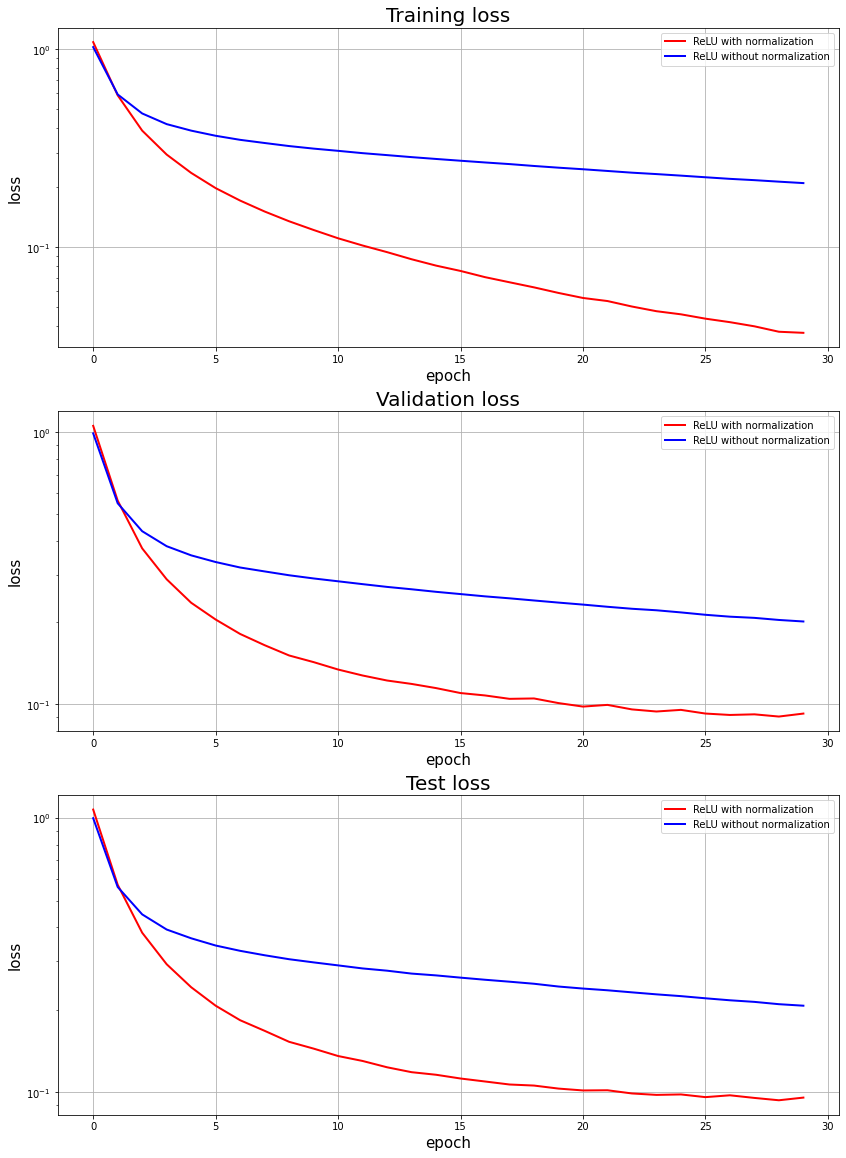

Resulting duration of training: 
 for ReLU without normalization: 383.6032 s, 
 for ReLU with normalization: 392.4308 s


In [27]:
n_epoch = 30
batch_size = 1000
alpha = 0.9
n_in_1 = 100
n_in_2 = 10

torch_layer_1 = torch.nn.BatchNorm1d(n_in_1, eps=BatchNormalization(alpha).EPS, momentum=1.-alpha, affine=False)
torch_layer_2 = torch.nn.BatchNorm1d(n_in_2, eps=BatchNormalization(alpha).EPS, momentum=1.-alpha, affine=False)

bn1 = BatchNormalization(alpha)
bn1.moving_mean = torch_layer_1.running_mean.numpy().copy()
bn1.moving_variance = torch_layer_1.running_var.numpy().copy()

bn2 = BatchNormalization(alpha)
bn2.moving_mean = torch_layer_2.running_mean.numpy().copy()
bn2.moving_variance = torch_layer_2.running_var.numpy().copy()


net_r = Sequential()
net_r.add(Linear(28*28, 100))
net_r.add(ReLU())
net_r.add(Linear(100,10))
net_r.add(LogSoftMax())
criterion_r = ClassNLLCriterion()

net_norm = Sequential()
net_norm.add(Linear(28*28, 100))
net_norm.add(bn1)
net_norm.add(ChannelwiseScaling(100))
net_norm.add(ReLU())
net_norm.add(Linear(100,10))
net_norm.add(bn2)
net_norm.add(ChannelwiseScaling(10))
net_norm.add(LogSoftMax())
criterion_norm = ClassNLLCriterion()



val_loss_r = []
train_loss_r = []
test_loss_r = []

val_loss_norm = []
train_loss_norm = []
test_loss_norm = []

time_r = 0
time_norm = 0


for i in range(n_epoch):
    for x_batch, y_batch in get_batches((X_train, one_hot_y_train), batch_size):
        net_r.zeroGradParameters()
        net_norm.zeroGradParameters()
        
        time_r_start = time()
        predictions_r = net_r.forward(x_batch)
        loss_r = criterion_r.forward(predictions_r, y_batch)
        dp_r = criterion_r.backward(predictions_r, y_batch)
        net_r.backward(x_batch, dp_r)
        sgd_momentum(net_r.getParameters(), 
                     net_r.getGradParameters(), 
                     {'learning_rate' : 1e-1, 'momentum': 0.9},
                     {})
        time_r += time() - time_r_start 
        
        time_norm_start = time()
        predictions_norm = net_norm.forward(x_batch)
        loss_norm = criterion_norm.forward(predictions_norm, y_batch)
        dp_norm = criterion_norm.backward(predictions_norm, y_batch)
        net_norm.backward(x_batch, dp_norm)
        sgd_momentum(net_norm.getParameters(), 
                      net_norm.getGradParameters(), 
                       {'learning_rate' : 1e-1, 'momentum': 0.9},
                       {})
        
        time_norm += time() - time_norm_start

    pred_train_r = net_r.forward(X_train)
    train_loss_r.append(criterion_r.forward(pred_train_r, one_hot_y_train))
    pred_val_r = net_r.forward(X_val)
    val_loss_r.append(criterion.forward(pred_val_r, one_hot_y_val))
    pred_test_r = net_r.forward(X_test)
    test_loss_r.append(criterion_r.forward(pred_test_r, one_hot_y_test))
    
    
    pred_train_norm = net_norm.forward(X_train)
    train_loss_norm.append(criterion_norm.forward(pred_train_norm, one_hot_y_train))
    pred_val_norm = net_norm.forward(X_val)
    val_loss_norm.append(criterion.forward(pred_val_norm, one_hot_y_val))
    pred_test_norm = net_norm.forward(X_test)
    test_loss_norm.append(criterion_norm.forward(pred_test_norm, one_hot_y_test))
    
    display.clear_output(wait=True)
    print('n_epoch = {} out of {}'.format(i+1,n_epoch))
    print('Current duration of training: \n for ReLU without normalization: {} s, \n for ReLU with normalization: {} s'.format(round(time_r,4), round(time_norm,4)))
    plt.figure(figsize=(14, 20))

    plt.subplot(3,1,1)
    plt.title("Training loss", fontsize = 20)
    plt.xlabel("epoch", fontsize = 15)
    plt.ylabel("loss", fontsize = 15)
    plt.semilogy(train_loss_norm, lw = 2, color = 'r', label = 'ReLU with normalization')
    plt.semilogy(train_loss_r, lw = 2, color ='b', label = 'ReLU without normalization')
    plt.grid(True)
    plt.legend()

    plt.subplot(3,1,2)
    plt.title("Validation loss", fontsize = 20)
    plt.xlabel("epoch", fontsize = 15)
    plt.ylabel("loss", fontsize = 15)
    plt.semilogy(val_loss_norm, lw = 2, color ='r', label = 'ReLU with normalization')
    plt.semilogy(val_loss_r, lw = 2, color ='b', label = 'ReLU without normalization')
    plt.grid(True)
    plt.legend()
    
    plt.subplot(3,1,3)
    plt.title("Test loss", fontsize = 20)
    plt.xlabel("epoch", fontsize = 15)
    plt.ylabel("loss", fontsize = 15)
    plt.semilogy(test_loss_norm, lw = 2, color='r', label = 'ReLU with normalization')
    plt.semilogy(test_loss_r, lw = 2, color='b', label = 'ReLU without normalization')
    plt.grid(True)
    plt.legend()
    
    plt.show()
        
print('Resulting duration of training: \n for ReLU without normalization: {} s, \n for ReLU with normalization: {} s'.format(round(time_r,4), round(time_norm,4)))

**Optimizers**

n_epoch = 60 out of 60
Current duration of training: 
 for ELU SGD optimizer: 770.6518 s, 
 for ELU Adam optimizer: 777.9535 s


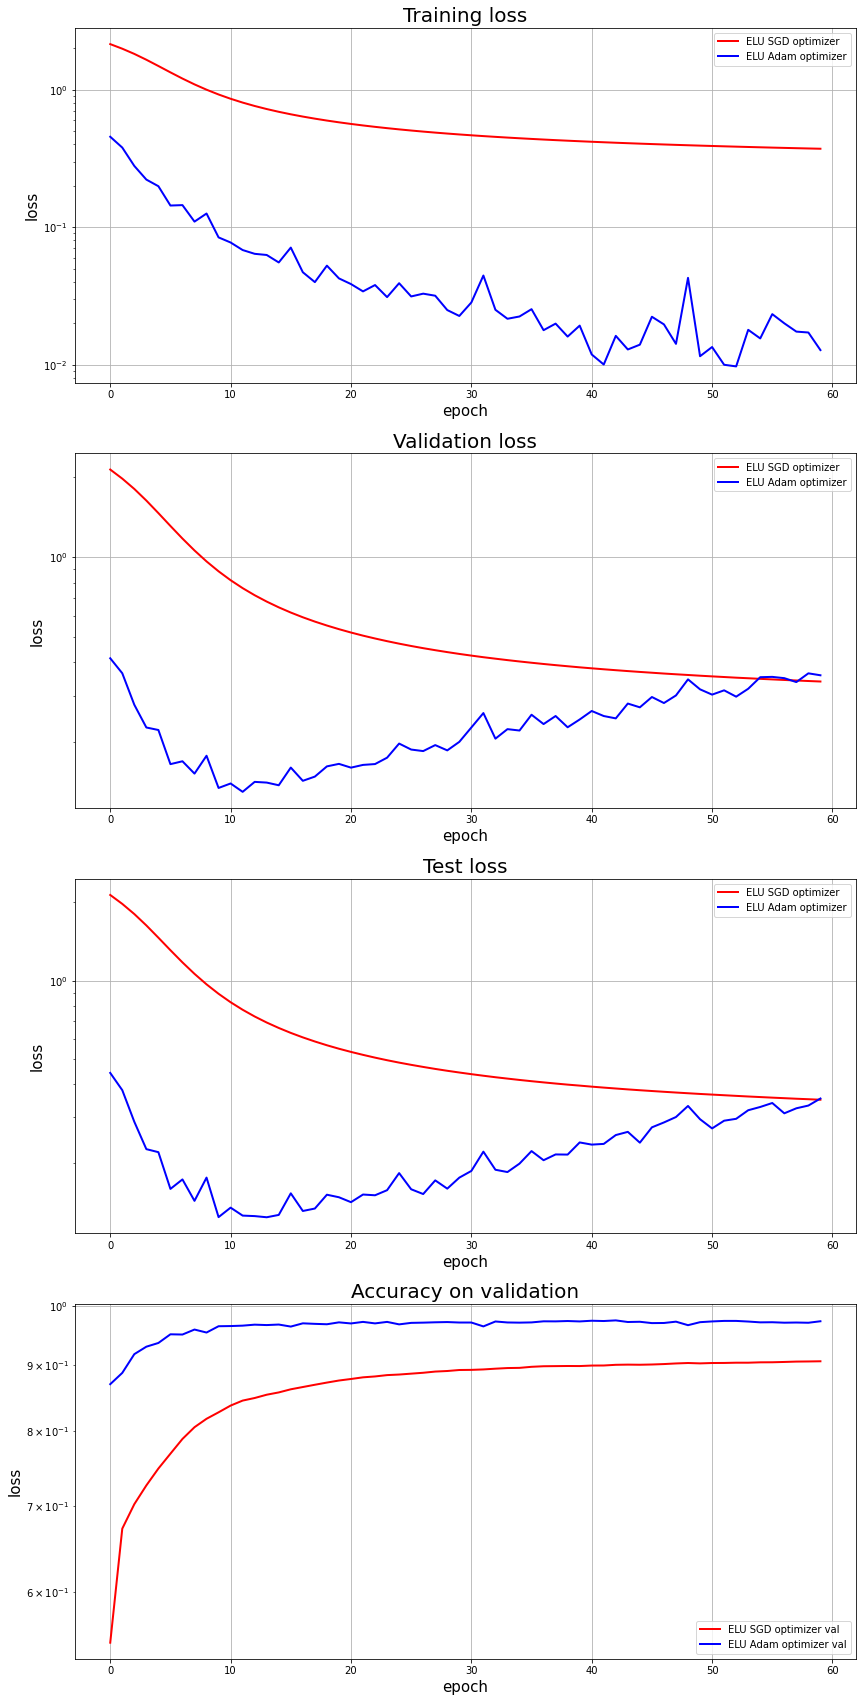

Resulting duration of training: 
 for ELU SGD optimizer: 770.6518 s, 
 for ELU Adam optimizer: 777.9535 s


In [15]:
n_epoch = 60
batch_size = 1000

net_1 = Sequential()
net_1.add(Linear(28*28, 100))
net_1.add(ELU())
net_1.add(Linear(100,10))
net_1.add(LogSoftMax())
criterion_1 = ClassNLLCriterion()

net_2 = Sequential()
net_2.add(Linear(28*28, 100))
net_2.add(ELU())
net_2.add(Linear(100,10))
net_2.add(LogSoftMax())
criterion_2 = ClassNLLCriterion()


train_loss_1 = []
val_loss_1 = []
test_loss_1 = []
train_acc_1 = []
val_acc_1 = []
train_loss_2 = []
val_loss_2 = []
test_loss_2 = []
train_acc_2 = []
val_acc_2 = []
time_1 = 0
time_2 = 0

for i in range(n_epoch):
    for x_batch, y_batch in get_batches((X_train, one_hot_y_train), batch_size):
        net_1.zeroGradParameters()
        net_2.zeroGradParameters()
        
        time_1_start = time()
        predictions_1 = net_1.forward(x_batch)
        loss_1 = criterion_1.forward(predictions_1, y_batch)
        dp_1 = criterion_1.backward(predictions_1, y_batch)
        net_1.backward(x_batch, dp_1)
        sgd_momentum(net_1.getParameters(), 
                     net_1.getGradParameters(), 
                     {'learning_rate' : 1e-2, 'momentum': 0.9},
                     {})
        time_1 += time() - time_1_start 
        
        time_2_start = time()
        predictions_2 = net_2.forward(x_batch)
        loss_norm = criterion_2.forward(predictions_2, y_batch)
        dp_2 = criterion_2.backward(predictions_2, y_batch)
        net_2.backward(x_batch, dp_2)
        adam_optimizer(net_2.getParameters(), net_2.getGradParameters(), {'learning_rate': 1e-2, 'beta1':0.9, 'beta2':0.99, 'epsilon': 1e-8}, {})
        time_2 += time() - time_2_start

    pred_train_1 = net_1.forward(X_train)
    train_loss_1.append(criterion_1.forward(pred_train_1, one_hot_y_train))
    pred_val_1 = net_1.forward(X_val)
    val_acc_1.append(accuracy(pred_val_1, np.argmax(one_hot_y_val, axis = -1)))
    val_loss_1.append(criterion_1.forward(pred_val_1, one_hot_y_val))
    pred_test_1 = net_1.forward(X_test)
    test_loss_1.append(criterion_1.forward(pred_test_1, one_hot_y_test))
    
    
    pred_train_2 = net_2.forward(X_train)
    train_loss_2.append(criterion_2.forward(pred_train_2, one_hot_y_train))
    pred_val_2 = net_2.forward(X_val)
    val_loss_2.append(criterion_2.forward(pred_val_2, one_hot_y_val))
    val_acc_2.append(accuracy(pred_val_2, np.argmax(one_hot_y_val, axis = -1)))
    pred_test_2 = net_2.forward(X_test)
    test_loss_2.append(criterion_2.forward(pred_test_2, one_hot_y_test))
    
    display.clear_output(wait=True)
    print('n_epoch = {} out of {}'.format(i+1,n_epoch))
    print('Current duration of training: \n for ELU SGD optimizer: {} s, \n for ELU Adam optimizer: {} s'.format(round(time_1,4), round(time_2,4)))
    plt.figure(figsize=(14, 30))

    plt.subplot(4,1,1)
    plt.title("Training loss", fontsize = 20)
    plt.xlabel("epoch", fontsize = 15)
    plt.ylabel("loss", fontsize = 15)
    plt.semilogy(train_loss_1, lw = 2, color='r', label = 'ELU SGD optimizer')
    plt.semilogy(train_loss_2, lw = 2, color='b', label = 'ELU Adam optimizer')
    plt.grid(True)
    plt.legend()

    plt.subplot(4,1,2)
    plt.title("Validation loss", fontsize = 20)
    plt.xlabel("epoch", fontsize = 15)
    plt.ylabel("loss", fontsize = 15)
    plt.semilogy(val_loss_1, lw = 2, color='r', label = 'ELU SGD optimizer')
    plt.semilogy(val_loss_2, lw = 2, color='b', label = 'ELU Adam optimizer')
    plt.grid(True)
    plt.legend()
    
    plt.subplot(4,1,3)
    plt.title("Test loss", fontsize = 20)
    plt.xlabel("epoch", fontsize = 15)
    plt.ylabel("loss", fontsize = 15)
    plt.semilogy(test_loss_1, lw = 2, color='r', label = 'ELU SGD optimizer')
    plt.semilogy(test_loss_2, lw = 2, color='b', label = 'ELU Adam optimizer')
    plt.grid(True)
    plt.legend()
    
    plt.subplot(4,1,4)
    plt.title("Accuracy on validation", fontsize = 20)
    plt.xlabel("epoch", fontsize = 15)
    plt.ylabel("loss", fontsize = 15)
    plt.semilogy(val_acc_1, lw = 2, color='r', label = 'ELU SGD optimizer val')
    plt.semilogy(val_acc_2, lw = 2, color='b', label = 'ELU Adam optimizer val')
    plt.grid(True)
    plt.legend()
    
    plt.show()
        
print('Resulting duration of training: \n for ELU SGD optimizer: {} s, \n for ELU Adam optimizer: {} s'.format(round(time_1,4), round(time_2,4)))

**Dropout**

n_epoch = 100 out of 100


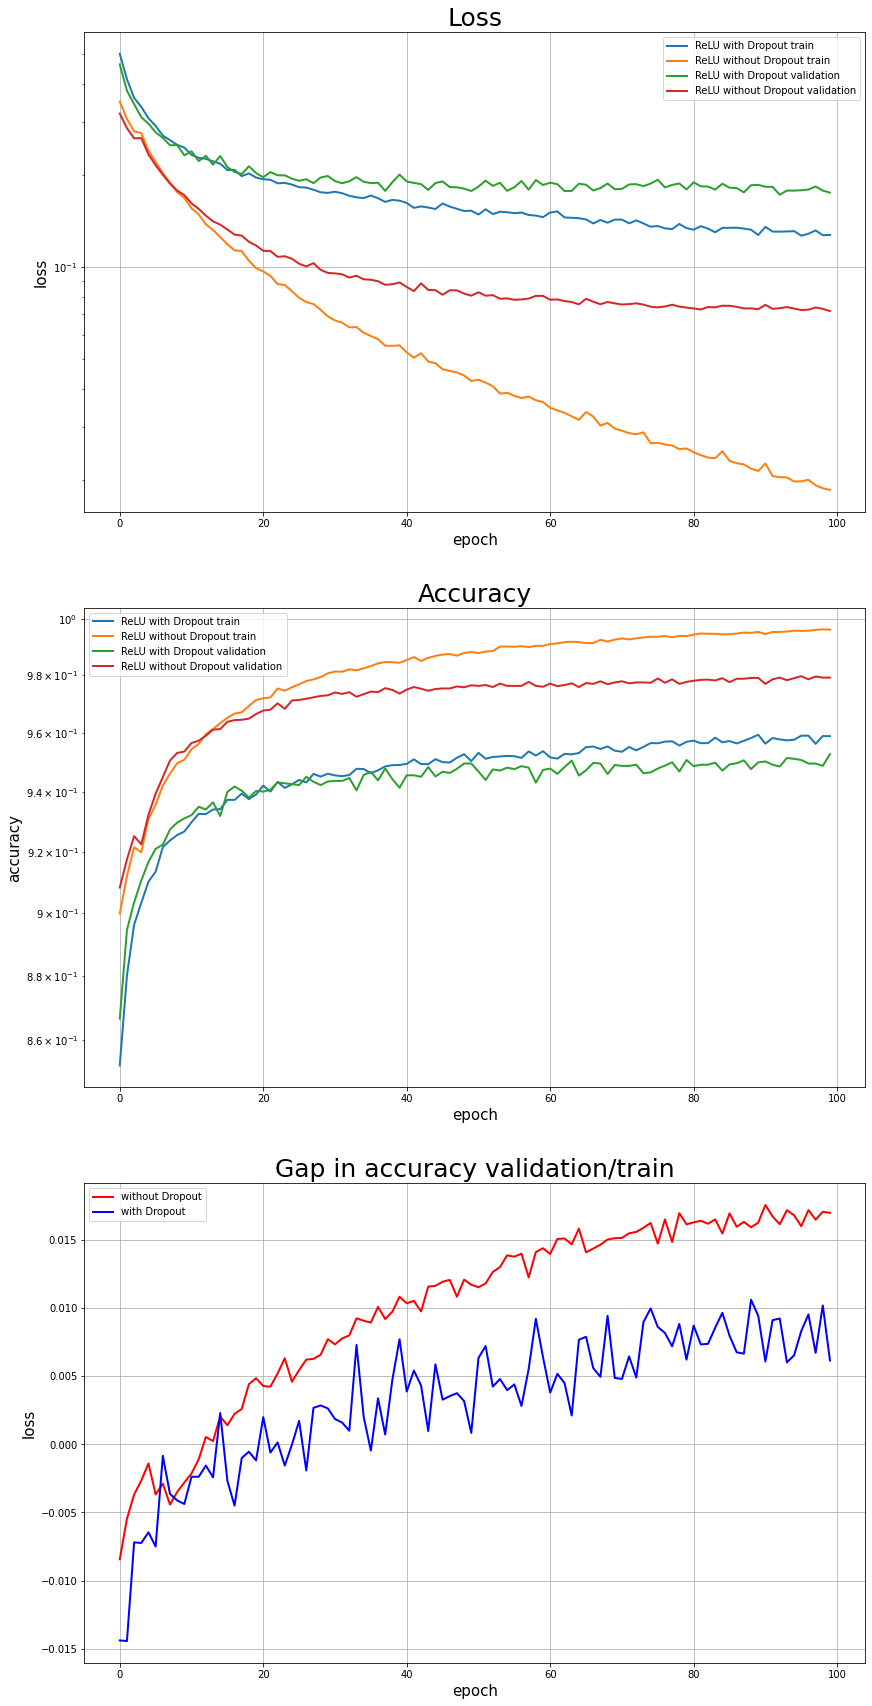

In [16]:
net_w = Sequential()
net_w.add(Linear(28*28, 600))
net_w.add(Dropout(0.9))
net_w.add(ELU())
net_w.add(Linear(600,10))
net_w.add(LogSoftMax())
criterion_w = ClassNLLCriterion()

net_wo = Sequential()
net_wo.add(Linear(28*28, 600))
net_wo.add(ELU())
net_wo.add(Linear(600,10))
net_wo.add(LogSoftMax())
criterion_wo = ClassNLLCriterion()


n_epoch = 100
batch_size = 1000
optimizer_config = {'learning_rate' : 1e-1, 'momentum': 0.9}
optimizer_state = {}

val_acc_w = []
val_loss_w = []
train_acc_w = []
train_loss_w = []


val_acc_wo = []
val_loss_wo = []
train_acc_wo = []
train_loss_wo = []


for i in range(n_epoch):
    for x_batch, y_batch in get_batches((X_train, one_hot_y_train), batch_size):
        
        net_w.zeroGradParameters()
        net_wo.zeroGradParameters()

        
        predictions_w = net_w.forward(x_batch)
        loss_w = criterion_w.forward(predictions_w, y_batch)
        dp_w = criterion_w.backward(predictions_w, y_batch)
        net_w.backward(x_batch, dp_w)
        sgd_momentum(net_w.getParameters(), 
                     net_w.getGradParameters(), 
                     optimizer_config,
                     optimizer_state)
        
        predictions_wo = net_wo.forward(x_batch)
        loss_wo = criterion_wo.forward(predictions_wo, y_batch)
        dp_wo = criterion_wo.backward(predictions_wo, y_batch)
        net_wo.backward(x_batch, dp_wo)
        sgd_momentum(net_wo.getParameters(), 
                     net_wo.getGradParameters(), 
                     optimizer_config,
                     optimizer_state)
        
        

    
    
    pred_train_w = net_w.forward(X_train)
    train_loss_w.append(criterion_w.forward(pred_train_w, one_hot_y_train))
    train_acc_w.append(accuracy(pred_train_w,np.argmax(one_hot_y_train,axis = -1)))
    pred_val_w = net_w.forward(X_val)
    val_loss_w.append(criterion_w.forward(pred_val_w, one_hot_y_val))
    val_acc_w.append(accuracy(pred_val_w,np.argmax(one_hot_y_val,axis = -1)))

    
    
    pred_train_wo = net_wo.forward(X_train)
    train_loss_wo.append(criterion_wo.forward(pred_train_wo, one_hot_y_train))
    train_acc_wo.append(accuracy(pred_train_wo,np.argmax(one_hot_y_train,axis = -1)))
    pred_val_wo = net_wo.forward(X_val)
    val_loss_wo.append(criterion_wo.forward(pred_val_wo, one_hot_y_val))
    val_acc_wo.append(accuracy(pred_val_wo,np.argmax(one_hot_y_val,axis = -1)))
      

    # Visualize
    display.clear_output(wait=True)
    print('n_epoch = {} out of {}'.format(i+1,n_epoch)) 
    plt.figure(figsize=(14, 30))

    plt.subplot(3,1,1)
    plt.title("Loss", fontsize = 25)
    plt.xlabel("epoch", fontsize = 15)
    plt.ylabel("loss", fontsize = 15)
    plt.semilogy(train_loss_w, lw = 2, label = 'ReLU with Dropout train')
    plt.semilogy(train_loss_wo, lw = 2, label = 'ReLU without Dropout train')
    plt.semilogy(val_loss_w, lw = 2, label = 'ReLU with Dropout validation')
    plt.semilogy(val_loss_wo, lw = 2, label = 'ReLU without Dropout validation')
    plt.grid(True)
    plt.legend()


    plt.subplot(3,1,2)
    plt.title("Accuracy", fontsize = 25)
    plt.xlabel("epoch", fontsize = 15)
    plt.ylabel("accuracy", fontsize = 15)
    plt.semilogy(train_acc_w, lw = 2, label = 'ReLU with Dropout train')
    plt.semilogy(train_acc_wo, lw = 2, label = 'ReLU without Dropout train')
    plt.semilogy(val_acc_w, lw = 2, label = 'ReLU with Dropout validation')
    plt.semilogy(val_acc_wo, lw = 2, label = 'ReLU without Dropout validation')
    plt.grid(True)
    plt.legend()
    
    plt.subplot(3,1,3)
    plt.title("Gap in accuracy validation/train", fontsize = 25)
    plt.xlabel("epoch", fontsize = 15)
    plt.ylabel("loss", fontsize = 15)
    plt.plot(np.array(train_acc_wo) - np.array(val_acc_wo), lw = 2,  color = 'r', label = 'without Dropout')
    plt.plot(np.array(train_acc_w) - np.array(val_acc_w), lw = 2, color = 'b', label = 'with Dropout')
    plt.grid(True)
    plt.legend()

    plt.show()

Write your personal opinion on the activation functions, think about computation times too. Does `BatchNormalization` help?

In [ ]:
# Your answer goes here. ################################################
Из приведенных выше результатов можно заключить, что худшей функцией активации считается SoftPlus, 
но она немного быстрее по времени по сравнению с другими функциями активации. 

В зависимости от размера пакета, то есть батча и скорости обучения - ReLU, LeakyReLU и ELU находятся на конкурирующих позициях с друг другом. 
В приведенной выше конфигурации LeakyReLU и ReLU превосходят ELU. 

Как и должно быть, LeakyReLU очень близок по производительности к ReLU. 

Как нам известно, самой простой формой функции активации является представление ReLU активации, 
поэтому в соотношении производительность/сложность ReLU является победителем.

**Finally**, use all your knowledge to build a super cool model on this dataset. Use **dropout** to prevent overfitting, play with **learning rate decay**. You can use **data augmentation** such as rotations, translations to boost your score. Use your knowledge and imagination to train a model. Don't forget to call `training()` and `evaluate()` methods to set desired behaviour of `BatchNormalization` and `Dropout` layers.

In [ ]:
model.add_module('conv1', nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3)) # convolution
model.add_module('batch1', nn.BatchNorm2d(10))
model.add_module('relu1', nn.ReLU())
model.add_module('pool', nn.MaxPool2d(2))
model.add_module('flatten', Flatten())
model.add_module('dense1', nn.Linear(10 * 15 * 15, 100))
model.add_module('batch2', nn.BatchNorm1d(100))
model.add_module('relu2', nn.ReLU())
model.add_module('dropout', nn.Dropout2d(0.1))
model.add_module('dense2', nn.Linear(100, 10))

In [28]:
# Your code goes here. ################################################

n_epoch = 30
batch_size = 1000
alpha = 0.9
n_in_1 = 100
n_in_2 = 10

torch_layer_1 = torch.nn.BatchNorm1d(n_in_1, eps=BatchNormalization(alpha).EPS, momentum=1.-alpha, affine=False)
torch_layer_2 = torch.nn.BatchNorm1d(n_in_2, eps=BatchNormalization(alpha).EPS, momentum=1.-alpha, affine=False)

bn1 = BatchNormalization(alpha)
bn1.moving_mean = torch_layer_1.running_mean.numpy().copy()
bn1.moving_variance = torch_layer_1.running_var.numpy().copy()

bn2 = BatchNormalization(alpha)
bn2.moving_mean = torch_layer_2.running_mean.numpy().copy()
bn2.moving_variance = torch_layer_2.running_var.numpy().copy()

net = Sequential()
net.add(Linear(28*28, 100))
net.add(bn1)
net.add(ChannelwiseScaling(100))
net.add(ReLU())
net.add(Linear(100,10))
net.add(bn2)
net.add(ChannelwiseScaling(10))
net.add(LogSoftMax())
criterion_norm = ClassNLLCriterion()

print(net)

Linear 784 -> 100
BatchNormalization
ChannelwiseScaling
ReLU
Linear 100 -> 10
BatchNormalization
ChannelwiseScaling
LogSoftMax



In [29]:
# Optimizer params
optimizer_config = {'learning_rate' : 1e-1, 'momentum': 0.9}
optimizer_state = {}

# Looping params
n_epoch = 50
batch_size = 128

In [30]:
# batch generator
def get_batches(dataset, batch_size):
    X, Y = dataset
    n_samples = X.shape[0]
        
    # Shuffle at the start of epoch
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        
        batch_idx = indices[start:end]
    
        yield X[batch_idx], Y[batch_idx]

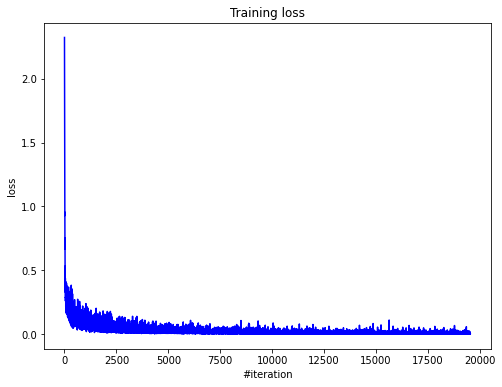

Current loss: 0.003684


In [31]:
loss_history = []

for i in range(n_epoch):
    for x_batch, y_batch in get_batches((X_train, one_hot_y_train), batch_size):
        
        net.zeroGradParameters()
        
        # Forward
        predictions = net.forward(x_batch)
        loss = criterion.forward(predictions, y_batch)
    
        # Backward
        dp = criterion.backward(predictions, y_batch)
        net.backward(x_batch, dp)
        
        # Update weights
        sgd_momentum(net.getParameters(), 
                     net.getGradParameters(), 
                     optimizer_config,
                     optimizer_state)      
        
        loss_history.append(loss)

    # Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(8, 6))
        
    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(loss_history, 'b')
    plt.show()
    
    print('Current loss: %f' % loss)

In [ ]:
one_hot_y_train = one_hot(y_train)
one_hot_y_val = one_hot(y_val)
one_hot_y_test = one_hot(y_test)

X_train = X_train.reshape([len(X_train),-1])
X_val = X_val.reshape([len(X_val),-1])
X_test = X_test.reshape([len(X_test),-1])

In [32]:
pred_test_relu = net.forward(X_test)

In [34]:
pred_test_relu

array([[-1.62784353e+01, -1.61135215e+01, -2.00998769e+01, ...,
        -1.11567957e-06, -1.81640025e+01, -1.71947369e+01],
       [-2.11384041e+01, -2.26222315e+01, -3.70448986e-06, ...,
        -2.97830078e+01, -1.91184877e+01, -2.70440773e+01],
       [-1.88485525e+01, -1.69210637e-05, -1.11445304e+01, ...,
        -1.30676838e+01, -1.67377178e+01, -2.15317834e+01],
       ...,
       [-3.28748667e+01, -2.53317800e+01, -3.55338178e+01, ...,
        -1.72430464e+01, -2.47004462e+01, -1.74014190e+01],
       [-3.51410804e+01, -3.45011256e+01, -3.81224502e+01, ...,
        -4.03015579e+01, -2.57987687e+01, -3.50152512e+01],
       [-2.66139659e+01, -2.11468731e+01, -2.82213773e+01, ...,
        -2.58176411e+01, -3.26869947e+01, -2.42041508e+01]])

In [35]:
one_hot_y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Print here your accuracy on test set. It should be around 90%.

In [ ]:
# Your answer goes here. ################################################

In [37]:
accuracy(pred_test_relu,np.argmax(one_hot_y_test,axis = -1))

0.9801